In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install ecg_plot
!pip install wfdb

     |████████████████████████████████| 122kB 16.8MB/s 


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Module')

In [4]:
import ptb as pc 
import ecg_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from keras.preprocessing.sequence import pad_sequences
%load_ext autoreload
%autoreload
%reload_ext autoreload

Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3839 ticks ([0.04, ..., 153.56]),

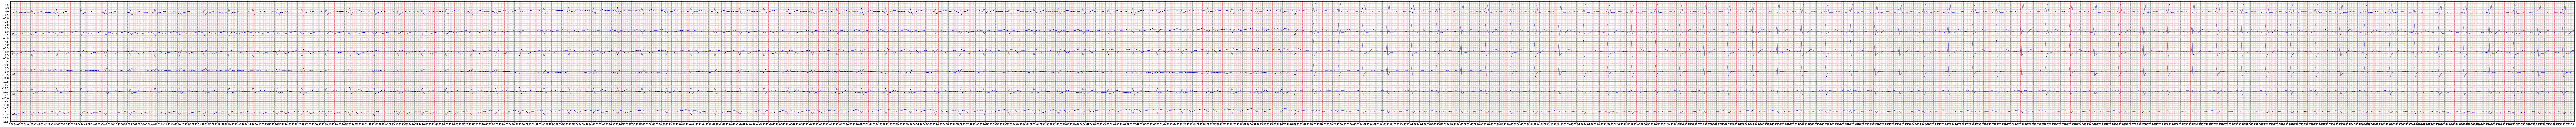

In [5]:
#plot ecg signal 
def plot_ecg(path):
  ecg_data = pc.load_challenge_data(path)#call function load_challenge_data from module ptb 
  ecg_plot.plot(ecg_data[0]/1000,sample_rate=500,title='')#Plot multi lead ECG chart
  ecg_plot.show()

plot_ecg('/content/drive/MyDrive/ptb/S0001.mat')



In [6]:
#store data in the list format 
gender, age, labels, ecg_filenames = pc.import_key_data( "/content/drive/MyDrive/ptb")
ecg_filenames = np.asarray(ecg_filenames)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


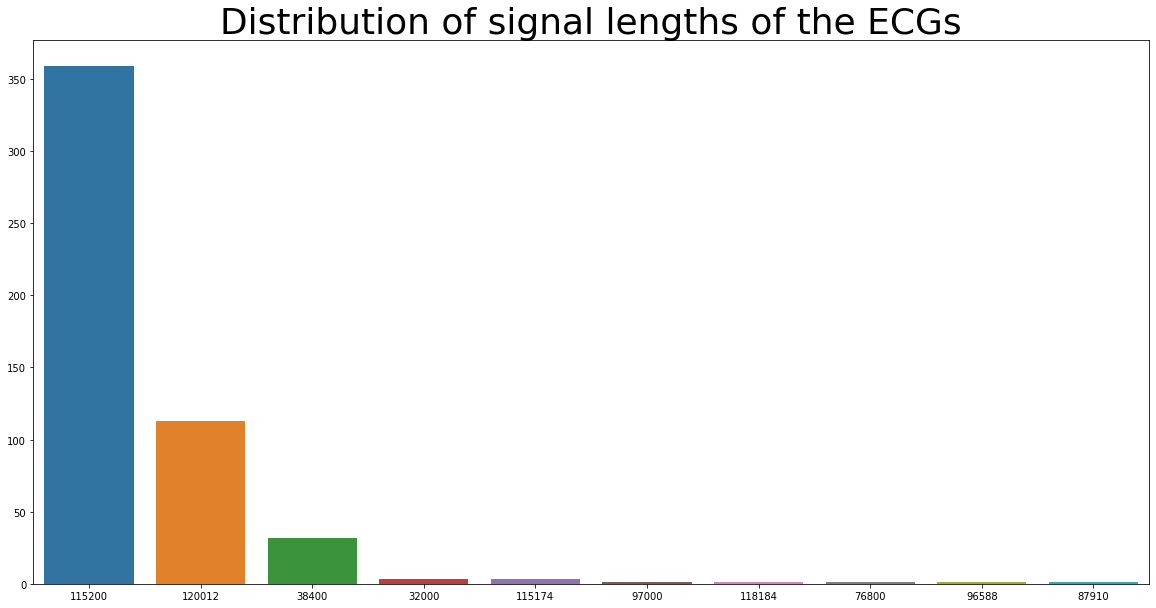

In [7]:
#plot the length of the ecg signal
pc.get_signal_lengths("/content/drive/MyDrive/ptb", "Distribution of signal lengths of the ECGs")

In [8]:
age, gender = pc.import_gender_and_age(age, gender)#get no of gender and age 

gender data shape: 516
age data shape: 516


In [9]:
SNOMED_scored=pd.read_csv("/content/drive/MyDrive/Module/SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv("/content/drive/MyDrive/Module/SNOMED_mappings_unscored.csv", sep=";")
df_labels = pc.make_undefined_class(labels,SNOMED_unscored)#decode the snomed ct

In [19]:
y,snomed_classes=pc.onehot_encode(df_labels) 

The classes we will look at are encoded as SNOMED CT codes:
['164889003' '164890007' '426783006' '427084000' 'undefined class']
classes: 4


In [15]:
snomed_abbr = []
for j in range(len(snomed_classes)):
    for i in range(len(SNOMED_scored.iloc[:,1])):
        if (str(SNOMED_scored.iloc[:,1][i]) == snomed_classes[j]):
            snomed_abbr.append(SNOMED_scored.iloc[:,2][i])
            
snomed_abbr = np.asarray(snomed_abbr)
print(snomed_abbr)

['AF' 'AFL' 'SNR' 'STach']


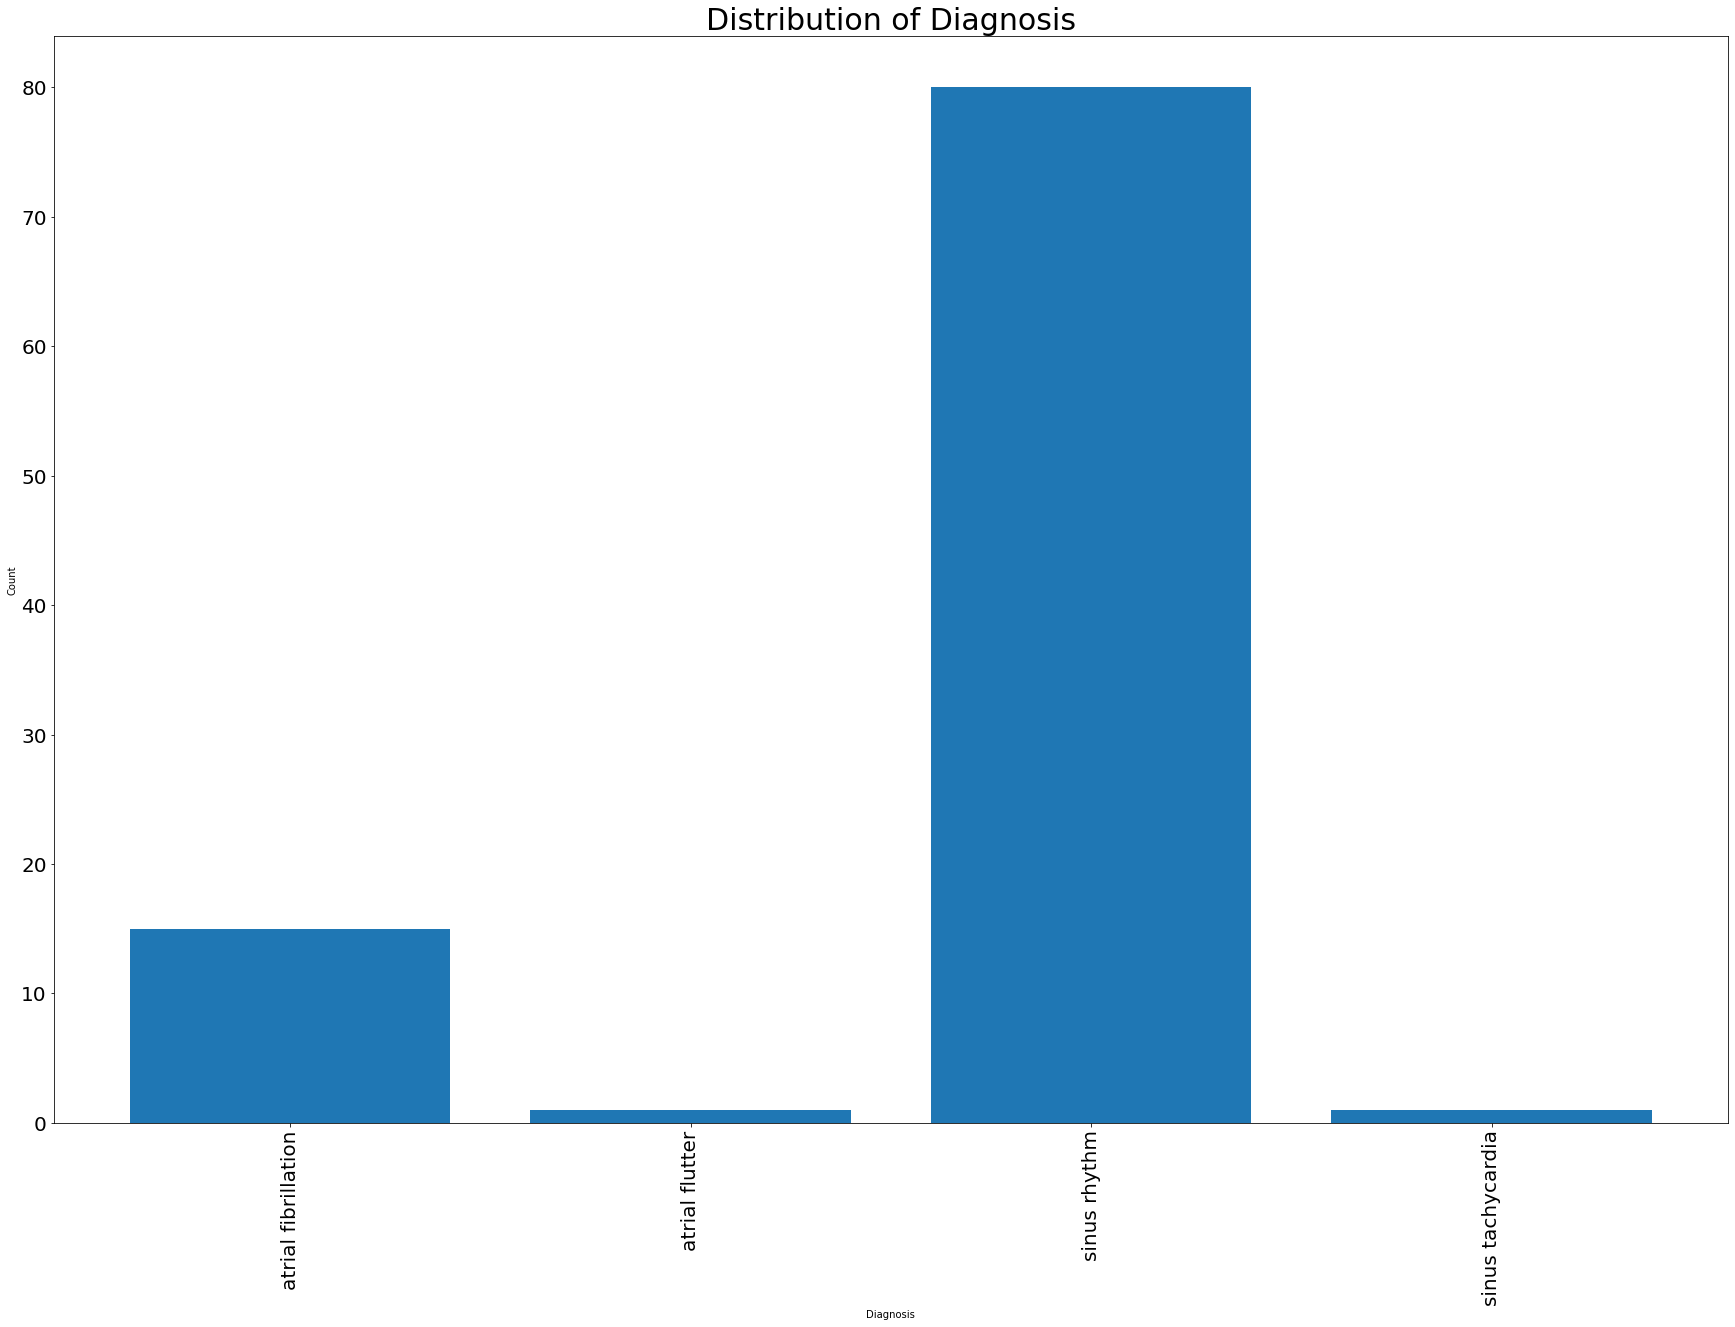

In [16]:
#the distribution of diagnoses accross the dataset 

pc.plot_classes(snomed_classes, SNOMED_scored,y)

In [21]:
y_all_comb = pc.get_labels_for_all_combinations(y)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_all_comb))))

Total number of unique combinations of diagnosis: 5
